In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
fashion= tf.keras.datasets.fashion_mnist

In [4]:
(xtrain, ytrain),(xtest, ytest) = fashion.load_data()

In [5]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
ytest[0]

9

In [7]:
classnames=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
xtrain=xtrain/255
xtest=xtest/255

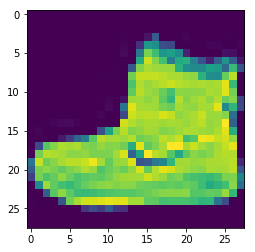

In [9]:
plt.imshow(xtrain[0])
plt.show()

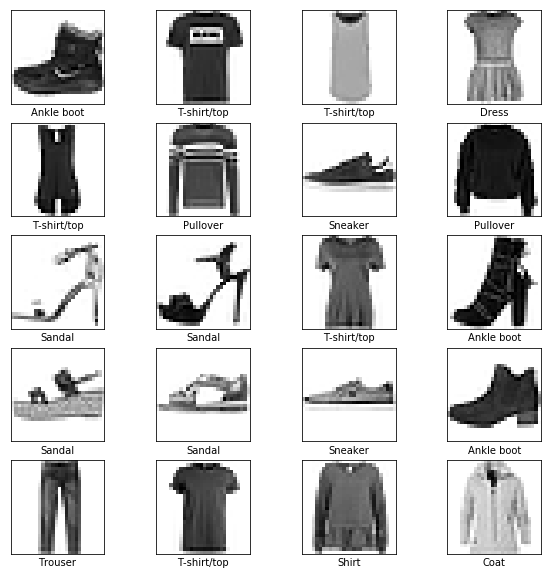

In [15]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[ytrain[i]])
    plt.show

In [25]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0912 13:21:59.876893  2892 deprecation.py:506] From C:\Users\Santosh\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
model.fit(xtrain,ytrain, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4857 - acc: 0.8264
Epoch 2/3
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3637 - acc: 0.8662
Epoch 3/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3298 - acc: 0.8786


In [35]:
testloss,testacc=model.evaluate(xtest,ytest)
print('test acc:', testacc,
     'test loss:', testloss)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3693 - acc: 0.8670
test acc: 0.867 test loss: 0.36929670072793963


In [39]:
prediction=model.predict(xtest)

In [43]:
np.argmax(prediction[0])

9

In [44]:
ytest[0]

9

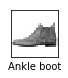

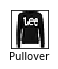

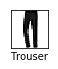

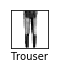

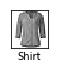

In [52]:
plt.figure(figsize=[5,5])
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtest[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[np.argmax(prediction[i])])
    plt.show()
